In [89]:
import pandas as pd
import random
import re
from collections import Counter
import matplotlib.pyplot as plt

In [6]:
syn = pd.read_csv("../../datasets/category_synonyms", "\t")

In [7]:
syn.head()

,id,synonym,meta_info
0,/arenda,взять на время,"{""sources"": [""custom_mborisov_alextim27_3110""]}"
1,/arenda,прокат и аренда,"{""sources"": [""profiru_name""]}"
2,/arenda/drugoe/fotostudii,снять фотостудию на час,"{""sources"": [""YDO-6734""]}"
3,/arenda/instrument,аренда инструмента инструментов,"{""sources"": [""YDO-6734""]}"
4,/arenda/instrument,аренда строительного инструмента,"{""sources"": [""YDO-1262""]}"


In [8]:
syn[syn["id"].apply(lambda x: "/remont-i-stroitel_stvo" in x)]

,id,synonym,meta_info
5935,/remont-i-stroitel_stvo,мастера по ремонту,"{""sources"": [""profiru_name""]}"
5936,/remont-i-stroitel_stvo,ремонтники и строители,"{""sources"": [""sukhoi_word_forms""]}"
5937,/remont-i-stroitel_stvo/betonnye-raboty,бетон и строительные,"{""sources"": [""YDO-82""]}"
5938,/remont-i-stroitel_stvo/betonnye-raboty,бетонирование,"{""sources"": [""YDO-82""]}"
5939,/remont-i-stroitel_stvo/betonnye-raboty,бетонные работы работ,"{""sources"": [""YDO-6734""]}"
...,...,...,...
9515,/remont-i-stroitel_stvo/zemlanye-raboty/transp...,грунт для отсыпки,"{""sources"": [""YDO-6734""]}"
9516,/remont-i-stroitel_stvo/zemlanye-raboty/transp...,машина песка с доставкой,"{""sources"": [""YDO-6734""]}"
9517,/remont-i-stroitel_stvo/zemlanye-raboty/transp...,привезти грунт,"{""sources"": [""custom_mborisov_alextim27_3110""]}"
9518,/remont-i-stroitel_stvo/zemlanye-raboty/valka-...,повалить дерево,"{""sources"": [""custom_mborisov_alextim27_3110""]}"


In [78]:
synonyms = syn[syn["id"].apply(lambda x: "/remont-i-stroitel_stvo" in x)].synonym.values
synonyms = list(set(list(synonyms)))

In [79]:
len(synonyms)

3331

In [ ]:
remont_n-grams_7

In [19]:
f = open("store_frequent_phrases/remont_n-grams_all_docs_modern_alg_2_4", "r")
ngramsM = {}
for line in f:
    ngramsM[line.split("\t")[0]] = line.split("\t")[1]
f.close()
print(len(ngramsM))

955845


In [18]:
f = open("store_frequent_phrases/remont_n-grams_all_docs_modern_alg_2_4_hash", "r")
ngramsM_hash = {}
for line in f:
    ngramsM_hash[line.split("\t")[0]] = line.split("\t")[1]
f.close()
print(len(ngramsM_hash))

3219155


In [2]:
f = open("store_frequent_phrases/remont_n-grams_all_docs_old_alg_10_4", "r")
ngramsC = {}
for line in f:
    ngramsC[line.split("\t")[0]] = line.split("\t")[1]
f.close()
print(len(ngramsC))

145144


In [109]:
f = open("store_frequent_phrases/remont_n-grams_all_docs_old_alg_6_4", "r")
ngramsC_6 = {}
for line in f:
    ngramsC_6[line.split("\t")[0]] = line.split("\t")[1]
f.close()
print(len(ngramsC_6))

326967


In [111]:
f = open("store_frequent_phrases/remont_n-grams_all_docs_old_alg_6_4_hash", "r")
ngramsC_6_hash = {}
for line in f:
    ngramsC_6_hash[line.split("\t")[0]] = line.split("\t")[1]
f.close()
print(len(ngramsC_6_hash))

1007880


In [110]:
f = open("store_frequent_phrases/remont_n-grams_all_docs_old_alg_10_4_hash", "r")
ngramsC_hash = {}
for line in f:
    ngramsC_hash[line.split("\t")[0]] = line.split("\t")[1]
f.close()
print(len(ngramsC_hash))

417057


In [15]:
intersection = 0
for key in ngramsC_hash.keys():
    if key in ngramsM:
        intersection += 1
print(intersection)

321073


In [16]:
random.seed(0)
M_only = []
for key in ngramsM.keys():
    if not key in ngramsC_hash:
        M_only.append(key)
random.shuffle(M_only)
print(M_only[0:50])

['противотоки аттракционы пластиковые мкости оснащение', 'сроки полная консультация', 'просвет могут быть видны полосы и разводы хотя', 'потолок от 350', 'с инсталляцией разбор', 'является наличие собственного автопарка', 'в 10 бетон в 10 с', 'автоматов ysonentity монтаж фасада', 'установка светодиодной ленты ysonentity демонтаж ванны ysonentity', 'сборка кухни гидроизоляция', 'дождевых стоков', 'ремонт квартиры быстрый ремонт квартиры', 'отопления и водоснабжения монтаж механического привода', 'важно соблюсти требования госта и строительные нормы важно чтобы', 'нагревательного мата в', 'паркета шлифовка циклевка паркета', 'посадка хвойного дерева удаление кустарника', 'монтаж радиаторов отопления установка контактора и автоматов', 'затем осуществляется монтаж', 'все правила и нюансы в итоге', 'натяжные потолки сатиновые натяжные потолки тканевые натяжные', 'звонка гарантия на', 'необходимые инструменты требуется кабельные и электромонтажные', 'конструкции стандартный режим эксплуатаци

In [17]:
random.seed(0)
C_hash_only = []
for key in ngramsC_hash.keys():
    if not key in ngramsM:
        C_hash_only.append(key)
random.shuffle(C_hash_only)
print(C_hash_only[0:50])

['плана технический надзор погрузка разгрузка стройматериала и вынос', 'зависимости от сложности задачи и объ', 'догруппировку чугунных радиаторов', 'тестирование в стоимость монтажа не входят', 'каркасные и панельно каркасные проекты домов и', 'взноса до 24 месяцев скидки от 5', '8 проводим все', 'профессиональный инструмент с его помощью работа сделана будет без', 'рассрочка мы стоим подписываешь акт сдачи объекта и все', 'работаем быстро и качественно инструмент наш', 'задачи в кратчайшие сроки работаем в красногорске с', 'омске опыт работы 15', 'за кв м в стоимость входит возведение теплого контура', 'проделанной работе финишные покрытия такие как плитка ламинат обои', 'работы нам важно что бы вы остались', 'доставка выезд бесплатный оплата по факту', 'назад все трубы и провода электрики не просто износились', 'всегда доходит именно то что', 'с его помощью работа', 'года предлагаем 40 скидки при работе', 'свое производство в ставрополе', 'уборка бесплатный выезд и замер бесплатное 

##### Проверим, сколько синонимов впринципе содержатся в текстах коллекции

In [40]:
f = open("vw_remont-i-stroitel_stvo_only_text_grouped_by_worker", "r")
texts = []
for line in f:
    texts.append(re.sub('[^A-Za-z0-9А-Яа-я]+', ' ', line).replace("  ", " ").replace("  ", " "))

In [41]:
len(texts)

59071

In [85]:
syn_freq = Counter()
syn_in_docs = Counter()
for synonym in synonyms:
    for text in texts:
        if synonym in text:
            syn_in_docs[synonym] += 1
        syn_freq[synonym] += text.count(synonym)

In [86]:
len(syn_in_docs)

1428

In [87]:
syn_terms = {}
for key in syn_in_docs.keys():
    if len(key.split()) > 1:
        syn_terms[key] = syn_in_docs[key]

In [88]:
len(syn_terms)

1305

### Построим графики:

##### полнота терминов из коллекции синонимов

In [63]:
intersection_synonyms_M = []
for key in syn_terms.keys():
    if key in ngramsM:
        intersection_synonyms_M.append(key)
print(len(intersection_synonyms_M) / len(syn_terms), len(intersection_synonyms_M))

0.39233716475095787 512


In [82]:
intersection_synonyms_M_hash = []
for key in syn_terms.keys():
    if key in ngramsM_hash:
        intersection_synonyms_M_hash.append(key)
print(len(intersection_synonyms_M_hash) / len(syn_terms), len(intersection_synonyms_M_hash))

0.7877394636015326 1028


In [83]:
intersection_synonyms_C = []
for key in syn_terms.keys():
    if key in ngramsC:
        intersection_synonyms_C.append(key)
print(len(intersection_synonyms_C) / len(syn_terms), len(intersection_synonyms_C))

0.3739463601532567 488


In [84]:
intersection_synonyms_C_hash = []
for key in syn_terms.keys():
    if key in ngramsC_hash:
        intersection_synonyms_C_hash.append(key)
print(len(intersection_synonyms_C_hash) / len(syn_terms), len(intersection_synonyms_C_hash))

0.4567049808429119 596


In [113]:
intersection_synonyms_C_6 = []
for key in syn_terms.keys():
    if key in ngramsC_6:
        intersection_synonyms_C_6.append(key)
print(len(intersection_synonyms_C_6) / len(syn_terms), len(intersection_synonyms_C_6))

0.46360153256704983 605


In [112]:
intersection_synonyms_C_6_hash = []
for key in syn_terms.keys():
    if key in ngramsC_6_hash:
        intersection_synonyms_C_6_hash.append(key)
print(len(intersection_synonyms_C_6_hash) / len(syn_terms), len(intersection_synonyms_C_6_hash))

0.5992337164750958 782


In [ ]:
ngramsC_6_hash

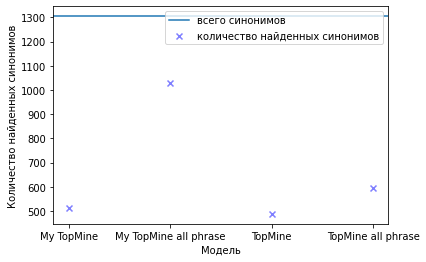

In [107]:
plt.scatter(["My TopMine", "My TopMine all phrase", "TopMine", "TopMine all phrase"],
            [len(intersection_synonyms_M), 
            len(intersection_synonyms_M_hash), 
            len(intersection_synonyms_C), 
            len(intersection_synonyms_C_hash)],
            c="b", alpha=0.5, marker="x", label="количество найденных синонимов")
plt.axhline(y=len(syn_terms), label="всего синонимов")
plt.xlabel("Модель")
plt.ylabel("Количество найденных синонимов")
plt.legend(loc='upper right')
plt.show()



##### объем полученных n-грамм


In [31]:
print(len(ngramsM))
print(len(ngramsM_hash))
print(len(ngramsC))
print(len(ngramsC_hash))




955845
3219155
145144
417057


##### Попали в оригинал, не попали в модерниированный (термы содержащиеся в одном документе)

In [34]:
intersection = 0
for key in ngramsC_hash.keys():
    if key in ngramsM_hash:
        intersection += 1
print(len(ngramsC_hash) - intersection, "/", len(ngramsC_hash), "=", (len(ngramsC_hash) - intersection) / len(ngramsC_hash))

95984 / 417057 = 0.23014599922792328


In [35]:
intersection = 0
for key in ngramsC.keys():
    if key in ngramsM_hash:
        intersection += 1
print(len(ngramsC) - intersection, "/", len(ngramsC), "=", (len(ngramsC) - intersection) / len(ngramsC))

14508 / 145144 = 0.09995590585900899
